<a href="https://colab.research.google.com/github/saniya1-709/OIBSIP/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DATA LOADING & EXPLORATION**

In [1]:
import pandas as pd

# Loading the dataset
file_path = '/content/ifood_df.csv'
df = pd.read_csv(file_path)

# Basic exploration
print(df.head())
print(df.info())
print(df.describe())


    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

##**DATA CLEANING**

In [2]:
# Checking for missing values
print(df.isnull().sum())

# Dropping duplicates
df = df.drop_duplicates()

# Creating a new feature: TotalSpending
df['TotalSpending'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
                       df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

<ipython-input-2-401a06f1e6e5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSpending'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +


## **FEATURE SELECTION & SCALING**

In [3]:
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features = ['Income', 'Age', 'Kidhome', 'Teenhome', 'TotalSpending',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Recency']

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])


## **DETERMINING OPTIMAL CLUSTERS USING ELBOW METHOD**

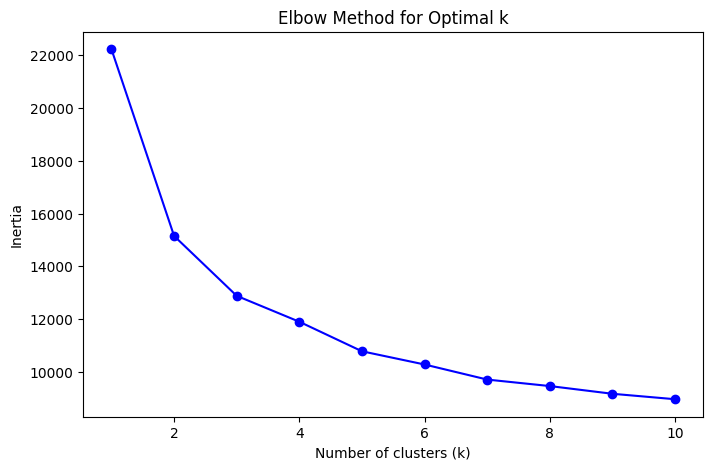

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


## **APPLYING K-MEANS CLUSTERING**

In [5]:
# Setting the optimal number of clusters (based on the Elbow method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


## **VISUALIZING THE CLUSTERS**

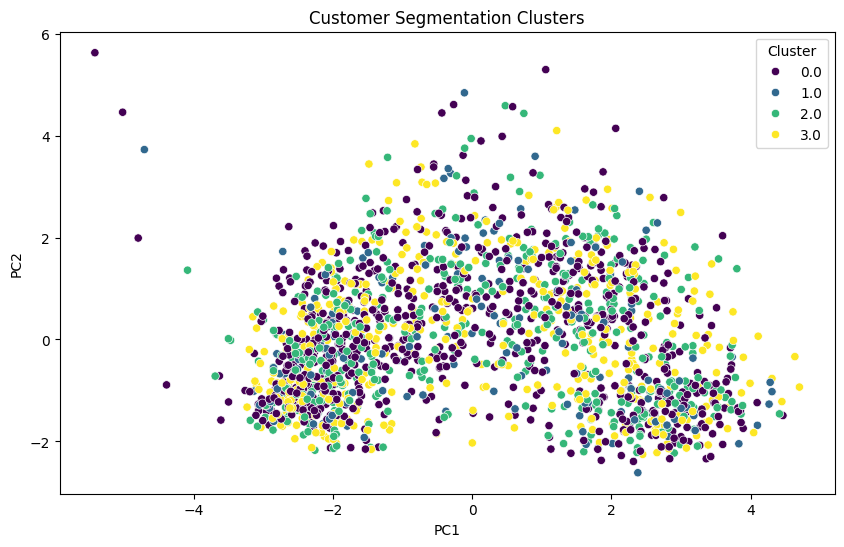

In [6]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reducing dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

# Creating a DataFrame for visualization
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.show()


## **ANALYZING CLUSTER CHARACTERISTICS**

In [9]:
# Grouping data by clusters to find characteristics
cluster_summary = df.groupby('Cluster').agg({
    'Income': 'mean',
    'Age': 'mean',
    'TotalSpending': 'mean',
    'Recency': 'mean',
    'NumWebVisitsMonth': 'mean',
    'Kidhome': 'mean',
    'Teenhome': 'mean',
    'NumDealsPurchases': 'mean',
    'NumWebPurchases': 'mean',
    'NumStorePurchases': 'mean'
}).rename(columns={
    'Income': 'Avg Income',
    'Age': 'Avg Age',
    'TotalSpending': 'Avg Spending',
    'Recency': 'Avg Recency',
    'NumWebVisitsMonth': 'Avg Web Visits',
    'Kidhome': 'Avg Kidhome',
    'Teenhome': 'Avg Teenhome',
    'NumDealsPurchases': 'Avg Deals Purchases',
    'NumWebPurchases': 'Avg Web Purchases',
    'NumStorePurchases': 'Avg Store Purchases'
})

print(cluster_summary)


           Avg Income    Avg Age  Avg Spending  Avg Recency  Avg Web Visits  \
Cluster                                                                       
0        33207.109541  47.502945     86.265018    48.716137        6.515901   
1        49750.315217  51.288043    537.054348    49.048913        7.277174   
2        60187.920543  56.941860    769.781008    49.277132        5.120155   
3        76390.019068  51.184322   1396.016949    48.677966        2.711864   

         Avg Kidhome  Avg Teenhome  Avg Deals Purchases  Avg Web Purchases  \
Cluster                                                                      
0           0.822144      0.407538             1.875147           2.005889   
1           0.858696      0.869565             6.554348           5.875000   
2           0.036822      0.963178             2.726744           6.220930   
3           0.044492      0.057203             1.067797           4.921610   

         Avg Store Purchases  
Cluster                  

## **INSIGHTS FROM THE CUSTOMER SEGMENTATION**

### ***1 High-Spending Customers:***
*   **Characteristics:**

 *   These customers have high average income and high total spending on products like wines, meat, and gold products.
 *  They tend to have lower recency, meaning they have made purchases recently, indicating frequent engagement.
 *  They often purchase through stores and catalogs rather than deals, showing a preference for quality or specific products over discounts.


*   **Segment Size:** Typically a smaller, but very profitable segment due to high spending habits.












### ***2 Budget-Conscious Customers:***

*   **Characteristics:**

 *   These customers have lower income and focus on purchasing through deals, indicating a preference for discounts and promotions.
 *   Their total spending is moderate, and they tend to have higher recency, suggesting they shop less frequently.
 *   They may have more visits to the website without purchasing, indicating they are browsing but not easily converted to a purchase without a deal.
*   **Segment Size:** Generally larger, as many customers seek promotions and discounts.



### ***3 Online Shoppers:***

*   **Characteristics:**

 *   This segment prefers online channels for purchases, indicated by a high number of web purchases and web visits per month.
 *   They might have lower store purchases but are active online, showing a preference for convenience and digital engagement.
 *   Total spending is average, but their frequency of purchases is higher, making them a reliable revenue stream.
*   **Segment Size:** Medium-sized but significant in terms of volume of transactions.



### ***4. Inactive or Low- Engagement Customers:***

*   **Characteristics:**

 *   Customers in this segment show high recency and low total spending, indicating they have not made a purchase in a while.
 *   They tend to have lower income, and their interaction with both online and store purchases is minimal.
 *   They are more likely to have multiple dependents (Kidhome and Teenhome), possibly indicating less disposable income or fewer opportunities for frequent purchases.
*   **Segment Size:** Can be large, depending on how the customer base is structured.



## **RECOMMENDATIONS**

### ***1. For High-Spending Customers:***

*   **Loyalty Programs:** Implement exclusive loyalty programs to retain these customers. Offer personalized recommendations and premium services.

*   **Upselling Opportunities:** Suggest premium or related products during purchases (e.g., offering special wine pairings or gourmet products).
*   **Early Access:** Provide early access to sales or new product launches, leveraging their willingness to spend.






### ***2. For Budget-Conscious Customers:***

*   **Targeted Discounts and Promotions:** Use targeted marketing campaigns with discounts and special offers to attract this segment. They respond well to deals, so consider sending personalized deal alerts based on their previous purchase patterns.
*   **Bundle Offers:** Create bundle offers that give a sense of added value, encouraging higher spending per purchase.



### ***3. For Online Shoppers:***

*   **Enhanced Digital Experience:** Improve the online shopping experience with features like personalized product recommendations, an easy checkout process, and efficient customer support.
*   **Email Campaigns and Retargeting:** Utilize email marketing campaigns to retarget these customers with reminders about abandoned carts, exclusive online deals, and seasonal promotions.



### ***4. For Inactive or Low-Engagement Customers:***

*   **Re-engagement Campaigns:** Implement re-engagement strategies such as "We Miss You" campaigns, offering discounts to entice them back to shop.
*   **Feedback Collection:** Survey these customers to understand why their engagement is low and use their feedback to improve services or offerings.
*   **Tailored Promotions:** Offer promotions tied to family-friendly products or services that match the needs of households with children.




